In [40]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
from plotly.offline import init_notebook_mode
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
data = pd.read_csv("indian_food.csv")
data

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East
...,...,...,...,...,...,...,...,...,...
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,-1,-1,sweet,dessert,Jammu & Kashmir,North
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [43]:
data.describe()

,prep_time,cook_time
count,255.000000,255.000000
mean,31.105882,34.529412
std,72.554409,48.265650
min,-1.000000,-1.000000
25%,10.000000,20.000000
50%,10.000000,30.000000
75%,20.000000,40.000000
max,500.000000,720.000000


In [44]:
data.columns

Index(['name', 'ingredients', 'diet', 'prep_time', 'cook_time',
       'flavor_profile', 'course', 'state', 'region'],
      dtype='object')

In [52]:
# Unique values
print(data['diet'].unique())
print(data['flavor_profile'].unique())
print(data['course'].unique())
print(data['region'].unique())
print(data['state'].unique())

['vegetarian' 'non vegetarian']
['sweet' 'spicy' 'bitter' '-1' 'sour']
['dessert' 'main course' 'starter' 'snack']
['East' 'West' 'North' '-1' 'North East' 'South' 'Central']
['West Bengal' 'Rajasthan' 'Punjab' 'Uttar Pradesh' '-1' 'Odisha'
 'Maharashtra' 'Uttarakhand' 'Assam' 'Bihar' 'Andhra Pradesh' 'Karnataka'
 'Telangana' 'Kerala' 'Tamil Nadu' 'Gujarat' 'Tripura' 'Manipur'
 'Nagaland' 'NCT of Delhi' 'Jammu & Kashmir' 'Chhattisgarh' 'Haryana'
 'Madhya Pradesh' 'Goa']


In [48]:
data.isna().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

In [55]:
data[data['region'].isnull()]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
110,Panjeeri,"Whole wheat flour, musk melon seeds, poppy see...",vegetarian,10,25,sweet,dessert,Uttar Pradesh,NaN


In [58]:
# # Correcting the entry and checking if it worked
data['region'] = data['region'].replace(np.nan, 'North')
data[data['state'].isnull()]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region


In [66]:
# Replacing weird entries with values that makes more sense
data['prep_time']=data['prep_time'].fillna(data['prep_time'])
data['cook_time']=data['cook_time'].fillna(data['cook_time'])
data['flavor_profile'] = data['flavor_profile'].replace('-1', 'others')
data['region'] = data['region'].replace('-1', 'Others')
data['state'] = data['state'].replace('-1', 'Others')

print(data['flavor_profile'].unique())
print(data['region'].unique())
print(data['state'].unique())


['sweet' 'spicy' 'bitter' 'others' 'sour']
['East' 'West' 'North' 'Others' 'North East' 'South' 'Central']
['West Bengal' 'Rajasthan' 'Punjab' 'Uttar Pradesh' 'Others' 'Odisha'
 'Maharashtra' 'Uttarakhand' 'Assam' 'Bihar' 'Andhra Pradesh' 'Karnataka'
 'Telangana' 'Kerala' 'Tamil Nadu' 'Gujarat' 'Tripura' 'Manipur'
 'Nagaland' 'NCT of Delhi' 'Jammu & Kashmir' 'Chhattisgarh' 'Haryana'
 'Madhya Pradesh' 'Goa']


In [67]:
data.isnull().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            0
Time              0
dtype: int64

In [160]:
data.shape

(255, 9)

##  Total count of vegitarian & non vegitarian diet 

In [5]:
diet_data = data['diet'].value_counts().reset_index()
diet_data

,index,diet
0,vegetarian,226
1,non vegetarian,29


In [6]:
diet_data.columns = ['diet','count']

In [8]:
fig=px.pie(diet_data, values='count', names='diet', color_discrete_sequence=['green','red'],
           title='Total count of vegitarian & non vegitarian diet')
fig.show()

## Top 10 Shortest Overall Time Meal per Course 

In [68]:
data['Time'] = data['prep_time'] + data['cook_time']
data.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,Time
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East,70
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West,110
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North,75
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West,45
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East,55


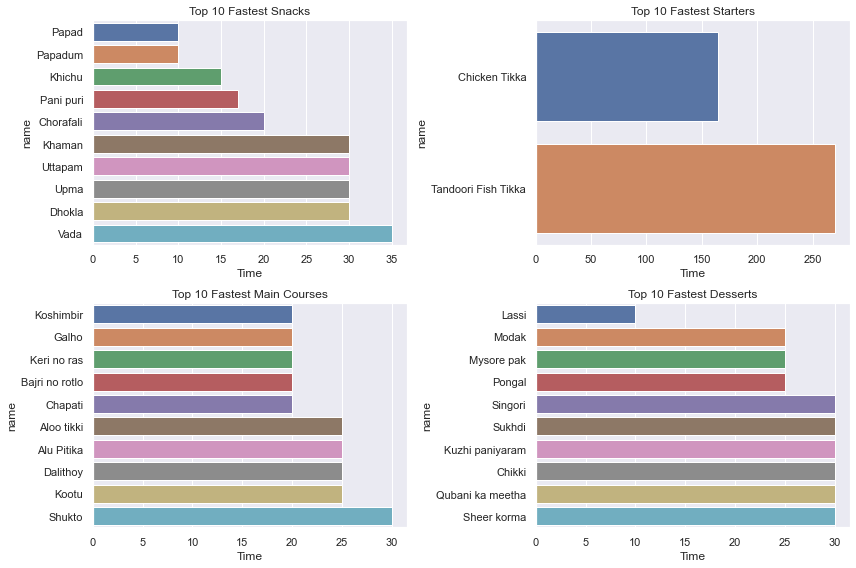

In [70]:
#Dishes based on the course whose preparation time is not 0
snack = data.loc[(data['Time'] > 0) & (data['course'] == 'snack')]
dessert = data.loc[(data['Time'] > 0) & (data['course'] == 'dessert')]
main = data.loc[(data['Time'] > 0) & (data['course'] == 'main course')]
starter = data.loc[(data['Time'] > 0) & (data['course'] == 'starter')]

#Get the top 10 dishes that took less time
fast_snacks = snack.sort_values(['Time'], ascending=True)[0:10]
fast_desserts = dessert.sort_values(['Time'], ascending=True)[0:10]
fast_main = main.sort_values(['Time'], ascending=True)[0:10]
fast_starter = starter.sort_values(['Time'], ascending=True)[0:10]

plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.barplot(x=fast_snacks['Time'], y=fast_snacks['name'], orient='h')
plt.title('Top 10 Fastest Snacks')

plt.subplot(2,2,2)
sns.barplot(x=fast_starter['Time'], y=fast_starter['name'], orient='h')
plt.title('Top 10 Fastest Starters')

plt.subplot(2,2,3)
sns.barplot(x=fast_main['Time'], y=fast_main['name'], orient='h')
plt.title('Top 10 Fastest Main Courses')

plt.subplot(2,2,4)
sns.barplot(x=fast_desserts['Time'], y=fast_desserts['name'], orient='h')
plt.title('Top 10 Fastest Desserts')

plt.tight_layout()
plt.show()

In [76]:
flav_data = data.flavor_profile.value_counts().reset_index()
flav_data.columns = ['flavor_profile', 'prep_time']
fig = px.bar(flav_data,x='flavor_profile',y='prep_time',title='variety of item according to the flavour',
color_discrete_sequence=['green'])
fig.show()

In [22]:
data.columns

Index(['name', 'ingredients', 'diet', 'prep_time', 'cook_time',
       'flavor_profile', 'course', 'state', 'region'],
      dtype='object')

## Statewise vegetarian & non vegetarian food

In [18]:
vegDiet_data=data[data.diet=='vegetarian']
vegDiet_data.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45.0,25.0,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15.0,60.0,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15.0,30.0,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15.0,40.0,sweet,dessert,West Bengal,East


In [19]:
statewise_vegDiet_data = vegDiet_data['state'].value_counts().reset_index()
statewise_vegDiet_data.columns=['state','count']
statewise_vegDiet_data

,state,count
0,Gujarat,35
1,Punjab,28
2,Maharashtra,28
3,West Bengal,19
4,Tamil Nadu,19
5,Assam,11
6,Andhra Pradesh,10
7,Uttar Pradesh,9
8,Kerala,7
9,Odisha,7


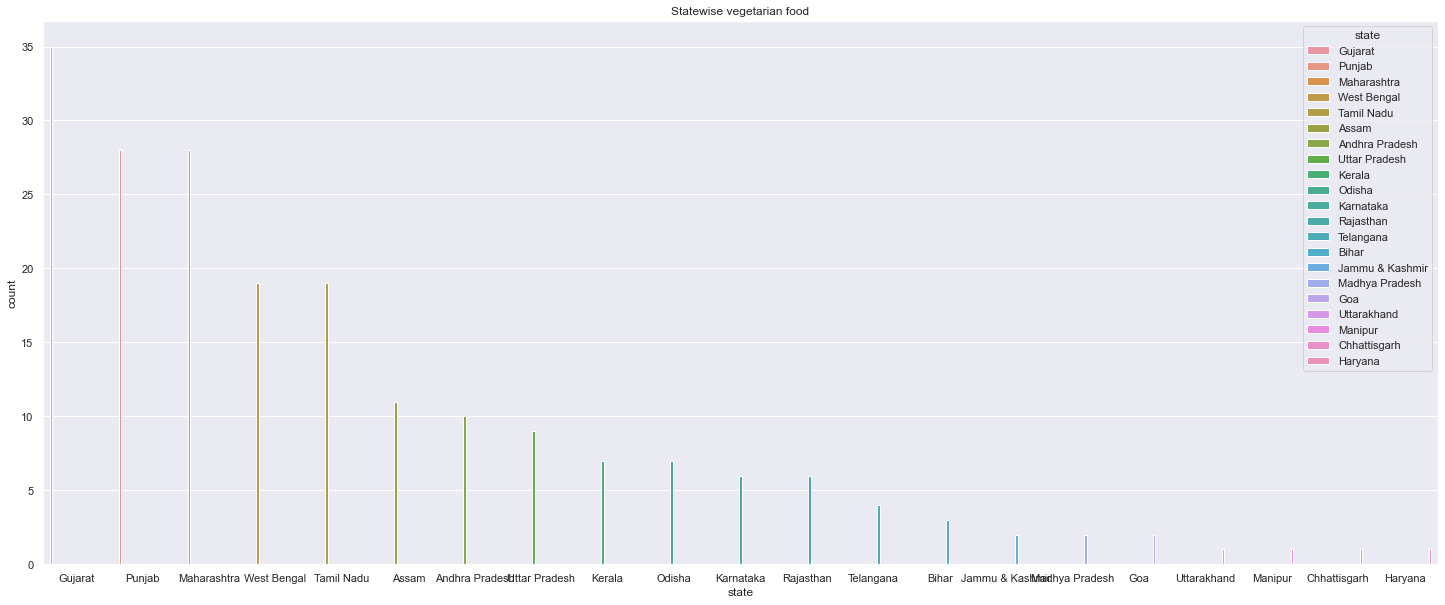

In [23]:
sns.set(rc={'figure.figsize':(25,10)})
sns.barplot(x="state",y='count',data=statewise_vegDiet_data,hue="state").set(title='Statewise vegetarian food')
plt.show()

In [24]:
nonvegDiet_data=data[data.diet=='non vegetarian']
nonvegDiet_data.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
64,Maach Jhol,"Fish, potol, tomato, chillies, ginger, garlic",non vegetarian,10.0,40.0,spicy,main course,Assam,North East
65,Pork Bharta,"Boiled pork, onions, chillies, ginger and garlic",non vegetarian,NaN,NaN,spicy,main course,Tripura,North East
67,Galho,"Rice, axone, salt, water, chillies, pork",non vegetarian,5.0,15.0,spicy,main course,Nagaland,North East
75,Biryani,"Chicken thighs, basmati rice, star anise, swee...",non vegetarian,30.0,120.0,spicy,main course,Telangana,South
76,Butter chicken,"Chicken, greek yogurt, cream, garam masala pow...",non vegetarian,10.0,35.0,spicy,main course,NCT of Delhi,North


In [25]:
statewise_nonvegDiet_data = nonvegDiet_data['state'].value_counts().reset_index()
statewise_nonvegDiet_data.columns=['state','count']
statewise_nonvegDiet_data

,state,count
0,Assam,10
1,West Bengal,5
2,Punjab,4
3,Maharashtra,2
4,Tripura,1
5,Nagaland,1
6,Telangana,1
7,NCT of Delhi,1
8,Kerala,1
9,Tamil Nadu,1


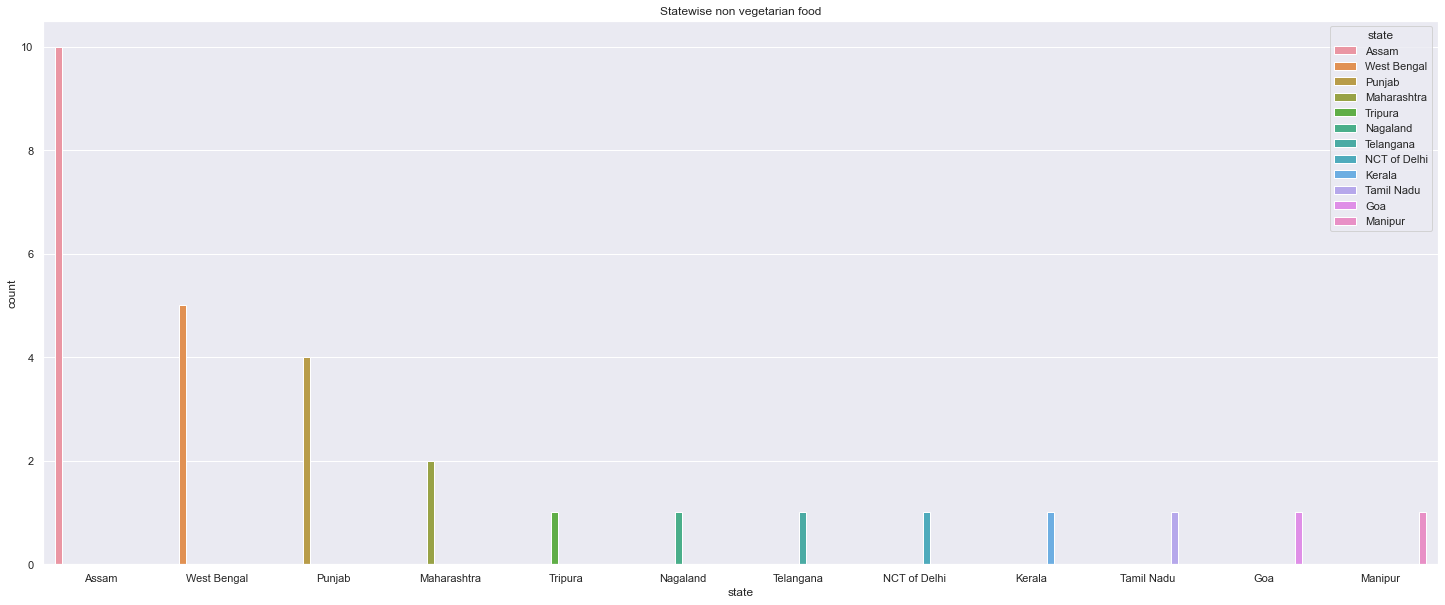

In [27]:
sns.set(rc={'figure.figsize':(25,10)})
sns.barplot(x="state",y='count',data=statewise_nonvegDiet_data,hue="state").set(title='Statewise non vegetarian food')
plt.show()

In [180]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            255 non-null    object 
 1   ingredients     255 non-null    object 
 2   diet            255 non-null    object 
 3   prep_time       225 non-null    float64
 4   cook_time       227 non-null    float64
 5   flavor_profile  226 non-null    object 
 6   course          255 non-null    object 
 7   state           231 non-null    object 
 8   region          241 non-null    object 
dtypes: float64(2), object(7)
memory usage: 18.1+ KB
